### Instalation

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from GameBoard import GameBoard
from Agent import Agent
from Basic_Agent import BasicAgent
from PrintAgent import PrintAgent

In [2]:
def check_win(board: GameBoard):
    return board.get_max_tile() >= 2048


int_to_string = ['UP', 'DOWN', 'LEFT', 'RIGHT']


### Single game
If we want to play a single game we have to execute the function from above.

In [3]:
def playSingleGame():
    agent: Agent
    board: GameBoard
    agent = PrintAgent()
    board = GameBoard()
    done = False
    moves = 0
    board.render()
    start = datetime.now()
    while not done:
        action = agent.play(board)
        print('Next Action: "{}"'.format(
            int_to_string[action]), ',   Move: {}'.format(moves))
        done = board.play(action)
        done = done or check_win(board)
        board.render()
        moves += 1

    print('\nTotal time: {}'.format(datetime.now() - start))
    print('\nTotal Moves: {}'.format(moves))
    if check_win(board):
        print("WON THE GAME!!!!!!!!")
    else:
        print("BOOOOOOOOOO!!!!!!!!!")


### Simulation

This function is used to test the minimax algorithm and analize the results, it doesn't print the board or the decisions.

In [4]:
def playGameWithoutPrint():
    agent: Agent
    board: GameBoard
    agent = BasicAgent()
    board = GameBoard()
    done = False
    moves = 0
    while not done:
        action = agent.play(board)
        done = board.play(action)
        done = done or check_win(board)
        moves += 1

    maxTile = board.get_max_tile()
    return moves, check_win(board), maxTile

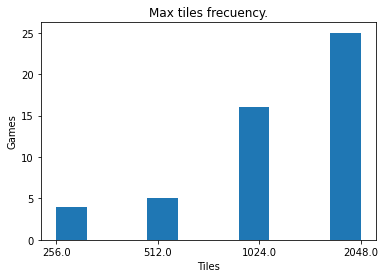

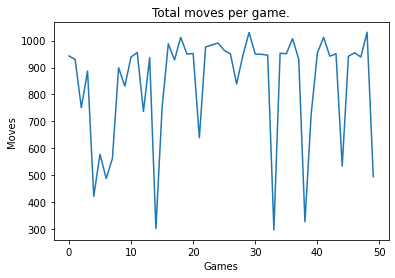

Total games: 50
Total wins: 25
Total lose: 25
Win percentage: 0.5
Tiles percentage:
2048 percentage: 0.5
1024 percentage: 0.32
512 percentage: 0.1
256 percentage: 0.08


In [5]:
gamesToPlay = 50
gameMoves = [0] * gamesToPlay
winGames = [0] * gamesToPlay
maxTiles = [0] * gamesToPlay
totalWins = 0
totalLose = 0
winPercentage = 0

for i in range(gamesToPlay):
    gameResult = playGameWithoutPrint()
    gameMoves[i] = gameResult[0]
    maxTiles[i] = gameResult[2]
    if gameResult[1]:
        winGames[i] = 1

for i in range(gamesToPlay):
    if winGames[i] == 1:
        totalWins = totalWins + 1
    else:
        totalLose = totalLose + 1

maxTilesPlot = maxTiles

maxTilesPlot.sort()
maxTilesPlot = [str(x) for x in maxTiles]
plt.hist(maxTilesPlot, label=True)
plt.xlabel('Tiles')
plt.ylabel('Games')
plt.title('Max tiles frecuency.')
plt.show()

plt.plot(gameMoves)
plt.xlabel('Games')
plt.ylabel('Moves')
plt.title('Total moves per game.')
plt.show()

print('Total games: ' + str(gamesToPlay))
print('Total wins: ' + str(totalWins))
print('Total lose: ' + str(totalLose))
winPercentage = totalWins / gamesToPlay
print('Win percentage: ' + str(winPercentage))

print('Tiles percentage:')
print('2048 percentage: ' + str((maxTiles.count(2048))/gamesToPlay))
print('1024 percentage: ' + str((maxTiles.count(1024))/gamesToPlay))
print('512 percentage: ' + str((maxTiles.count(512))/gamesToPlay))
print('256 percentage: ' + str((maxTiles.count(256))/gamesToPlay))


